In [2]:
import pandas as pd

def readMonthlyData(year, month):
    """
    Take int AD year and int month.
    Outpus monthly sum (column) by country (row).
    """
    filename = str(year) + '-' + str(month).zfill(2)
    df = pd.read_csv('//172.20.23.190/ds/Raw Data/MOF-us-2003-2016-rev/' + filename + '.tsv', sep='\t',
                     usecols=['國家', '貨品分類', '價值'])
    df.columns = ['country', 'code', 'val']
    df = df.groupby(['country']).agg({'val': 'sum'}).rename(columns={'val': filename})
    return df

In [3]:
import itertools
from functools import reduce

def joinMonthlyData(func, start_year, end_year):
    """
    Use func to read all monthly data within specified year range, then join by index.
    
    Parameters
    ----------
    func: {readMonthlyData, readImportdata}.
    """
    # Years and months to read
    years = range(start_year, end_year)
    months = range(1, 13)
    year_month = list(itertools.product(years, months))

    # Call func on years and months, cumulatively join each DataFrame
    df_map = map(lambda x, y: func(year=x, month=y), [x[0] for x in year_month], [x[1] for x in year_month])
    df = reduce(lambda x, y: pd.merge(left=x, right=y, how='outer', left_index=True, right_index=True), df_map)

    # Impute NA's and transpose DataFrame
    df.fillna(0, inplace=True)
    df = df.transpose()
    
    return df

In [4]:
# Create column for world, newsouth eighteen and ten
df = joinMonthlyData(func=readMonthlyData, start_year=2003, end_year=2014)
df['全球'] = df.sum(axis=1)
eighteen = ['不丹', '印尼', '印度', '孟加拉', '寮國', '尼泊爾', '巴基斯坦', '斯里蘭卡', '新加坡', '柬埔寨', '汶萊', '泰國', 
            '澳大利亞', '紐西蘭', '緬甸', '菲律賓', '越南', '馬來西亞']

ten = ['印尼', '寮國', '新加坡', '柬埔寨', '汶萊', '泰國', '緬甸', '菲律賓', '越南', '馬來西亞']
df['十八國'] = df.loc[:, eighteen].sum(axis=1)
df['十國'] = df.loc[:, ten].sum(axis=1)

In [5]:
def readImportData(year, month):
    """
    Takes int AD year and int month.
    Outputs monthly sum (column) by HS6 commodity (row).
    """
    filename = str(year) + '-' + str(month).zfill(2)
    im = pd.read_csv('//172.20.23.190/ds/Raw Data/MOF-us-2003-2016-rev/' + filename + '.tsv', sep='\t',
                     usecols=['貨品分類', '價值'], dtype = {'貨品分類': str, '價值': float})
    im.columns = ['code', 'val']
    im['level6'] = im['code'].apply(lambda x: x[:6])
    im = im.groupby(['level6']).agg({'val': 'sum'}).rename(columns={'val': filename})
    return im

In [6]:
X = joinMonthlyData(func=readImportData, start_year=2003, end_year=2014)

In [7]:
X

level6,010110,010190,010310,010391,010392,010511,010512,010519,010592,010593,...,961800,961900,970110,970190,970200,970300,970400,970500,970600,989900
2003-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,623.0,0.0,28.0,7.0,0.0,105.0,0.0,0.0,0.0,26273.0
2003-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,436.0,0.0,73.0,9.0,0.0,4.0,0.0,0.0,0.0,25020.0
2003-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,297.0,0.0,66.0,0.0,0.0,10.0,0.0,0.0,0.0,32600.0
2003-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,593.0,0.0,26.0,8.0,1.0,19.0,0.0,0.0,0.0,33778.0
2003-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540.0,0.0,63.0,7.0,0.0,16.0,0.0,0.0,0.0,33206.0
2003-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,634.0,0.0,536.0,1.0,0.0,38.0,0.0,0.0,0.0,40345.0
2003-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,493.0,0.0,86.0,27.0,0.0,4.0,0.0,0.0,0.0,39553.0
2003-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,845.0,0.0,18.0,0.0,9.0,3.0,0.0,0.0,0.0,38360.0
2003-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,542.0,0.0,74.0,0.0,0.0,14.0,0.0,0.0,0.0,41133.0
2003-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,534.0,0.0,147.0,5.0,0.0,10.0,0.0,0.0,0.0,37542.0


In [36]:
from sklearn import datasets
lin = datasets.load_linnerud()
X = lin.data
Y = lin.target

In [75]:
# Separate test set
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [94]:
# Perform mean normalization and feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

array([[ 0.94884747,  1.01224061, -0.44313301],
       [-0.3534922 , -0.51073538, -0.47369391],
       [-1.65583186, -1.29529878, -0.29032852],
       [ 0.3907019 ,  1.16607657,  0.77930288],
       [ 1.32094452,  1.796804  ,  2.76576119],
       [ 0.57675042,  0.3199788 , -0.16808493],
       [ 1.32094452, -0.21844706, -0.47369391],
       [-1.09768629, -1.14146282, -0.67233974],
       [-0.72558924, -0.14152908, -0.44313301],
       [-0.72558924, -0.98762686, -0.58065704]])

In [178]:
# Some useful variables
lambdas = np.logspace(-4, 1, 100)
n_lambdas = len(lambdas)
n_targets = Y.shape[1]
n_iter = 100

train_error = np.zeros((n_lambdas, n_targets))
cv_error = np.zeros((n_lambdas, n_targets))

from sklearn.metrics import mean_squared_error

for i in range(n_lambdas):
    l = lambdas[i]
    train_errors = np.zeros((n_iter, n_targets))
    cv_errors = np.zeros((n_iter, n_targets))
    for j in range(n_iter):
        X_train, X_cv, Y_train, Y_cv = train_test_split(X, Y, test_size=0.25)
        regr = Ridge(alpha=l)
        regr.fit(X_train, Y_train)
        Y_train_pred = regr.predict(X_train)
        Y_cv_pred = regr.predict(X_cv)
        train_errors[j, :] = mean_squared_error(Y_train, Y_train_pred, multioutput='raw_values')
        cv_errors[j, :] = mean_squared_error(Y_cv, Y_cv_pred, multioutput='raw_values')
    train_error[i, :] = np.mean(train_errors, axis=0)
    cv_error[i, :] = np.mean(cv_errors, axis=0)

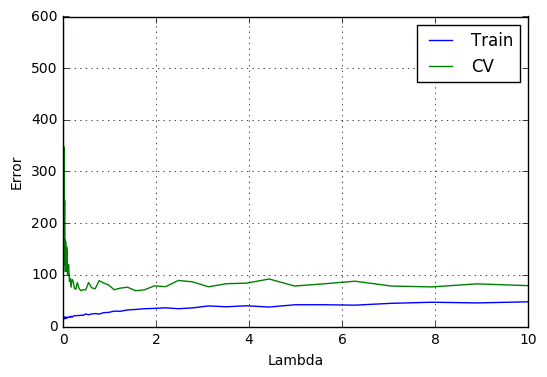

In [179]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(lambdas, train_error[:, 2])
plt.plot(lambdas, cv_error[:, 2])
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend(['Train', 'CV'])
plt.grid(True)
plt.show()

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
#regr = Ridge()
#regr.fit(X_train, Y_train)
#Y_pred = regr.predict(X_test)



# regr = GridSearchCV(Ridge(), param_grid=dict(alpha=np.logspace(0.001, 3, 10)))
# cross_val_score(regr, X_train, Y_train[:, 0], scoring='neg_mean_squared_error')

array([ -1855.6424725 , -14670.22910332,   -727.88158031])